# SRM 641 Week 4 Python: Data Visualization 2

## Plotting with Pandas



In `pandas`, we may have multiple columns of data, along with row and column labels. `pandas` itself has built-in methods that simplify creating visualizations from `DataFrame` and `Series` objects.

The `plot()` method is available on `Series` and `DataFrame` objects. Many of the parameters get passed down to matplotlib. The `kind` argument let's us vary the plot type.

## Data

In this notebook, we will be working with the previous 2 datasets:

- Facebook's stock price  
- Earthquake data (obtained from the US Geological Survey (USGS) using the USGS API)

## Setup

Load the data and libraries needed.

In [2]:
# Load the libraries

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
# Load the data

df_fb = pd.read_csv('Data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True)
df_quakes = pd.read_csv('earthquakes.csv')

## Data visualization

Plotting methods allow for a handful of plot styles other than the default line plot. These methods can be provided as the kind keyword argument to `plot()`, and include:

- ‘bar’ or ‘barh’ for bar plots

- ‘hist’ for histogram

- ‘box’ for boxplot

- ‘kde’ or ‘density’ for density plots

- ‘area’ for area plots

- ‘scatter’ for scatter plots

- ‘hexbin’ for hexagonal bin plots

- ‘pie’ for pie plots

### Evolution over time
Line plots help us see how a variable changes over time. They are the default for the kind argument, but we can pass `kind='line'` to be explicit in our intent:

<Axes: title={'center': 'Evolution of Facebook Open Price'}, xlabel='date'>

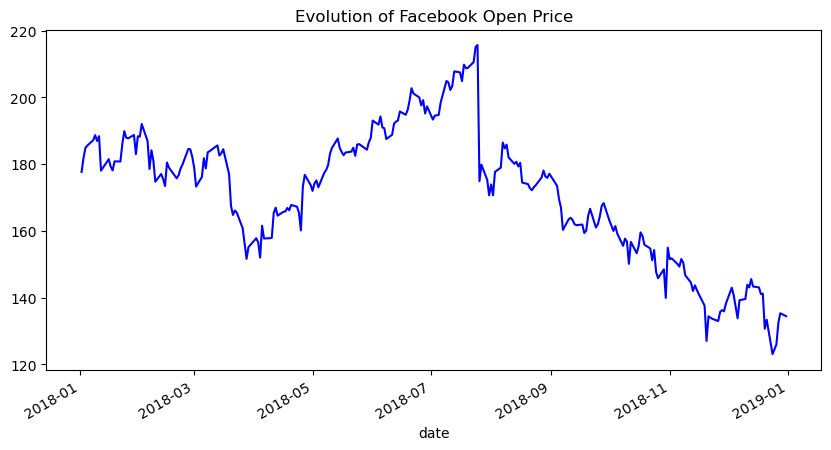

In [5]:
df_fb.plot(
    kind='line',
    y='open',
    figsize=(10, 5),
    style='-b',
    legend=False,
    title='Evolution of Facebook Open Price'
)

As with matplotlib, we don't have to use the stlye format strings, instead we can pass each component separately with its associated keyword. We can use the color and linestyle arguments to get the same result:

<Axes: title={'center': 'Evolution of Facebook Open Price'}, xlabel='date'>

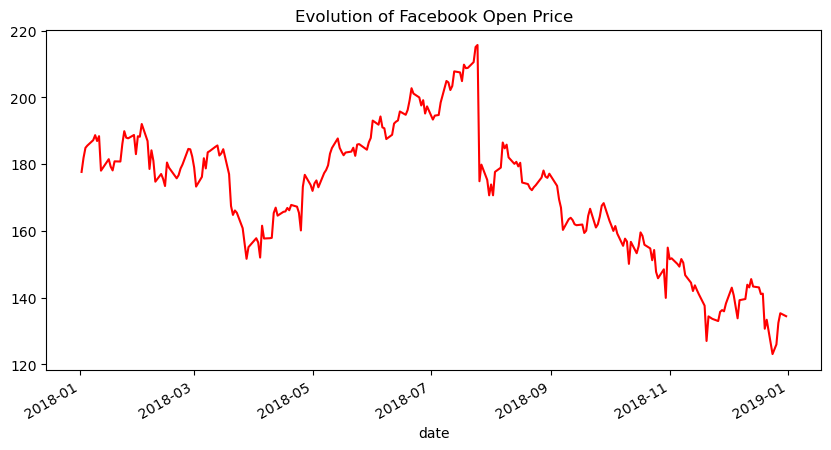

In [7]:
df_fb.plot(
    kind='line',
    y='open',
    figsize=(10, 5),
    color='red',
    linestyle='solid',
    legend=False,
    title='Evolution of Facebook Open Price'
)

We can also plot many lines at once by simply passing a list of the columns to plot. Note that we don't need to specify kind='line' because that is the default:

/var/folders/8b/sx311hbd0q3416wd84_c9kwc0000gn/T/ipykernel_15480/4201474595.py:1: FutureWarning: first is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  df_fb.first('1W').plot(


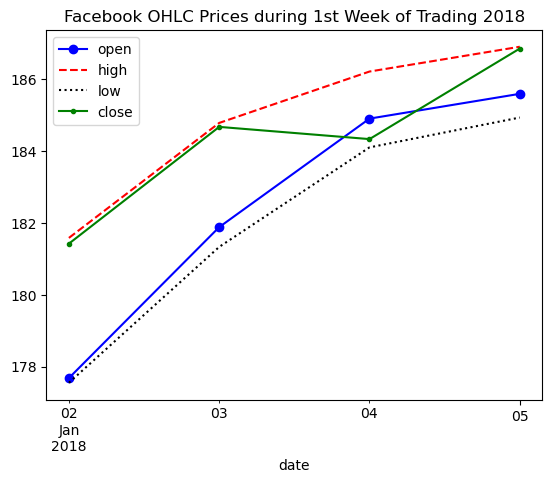

In [9]:
df_fb.first('1W').plot(
    y=['open', 'high', 'low', 'close'],
    style=['o-b', '--r', ':k', '.-g'],   
    title='Facebook OHLC Prices during 1st Week of Trading 2018'
).autoscale()

### Example format strings

- 'b'    # blue markers with default shape
- 'or'   # red circles
- '-g'   # green solid line
- '--'   # dashed line with default color
- '^k:'  # black triangle_up markers connected by a dotted line

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

## Creating subplots

When plotting with pandas, creating subplots is simply a matter of passing `subplots=True` to the `plot()` method, and (optionally) specifying the layout in a tuple of (rows, columns):

array([[<Axes: xlabel='date'>, <Axes: xlabel='date'>],
       [<Axes: xlabel='date'>, <Axes: xlabel='date'>],
       [<Axes: xlabel='date'>, <Axes: xlabel='date'>]], dtype=object)

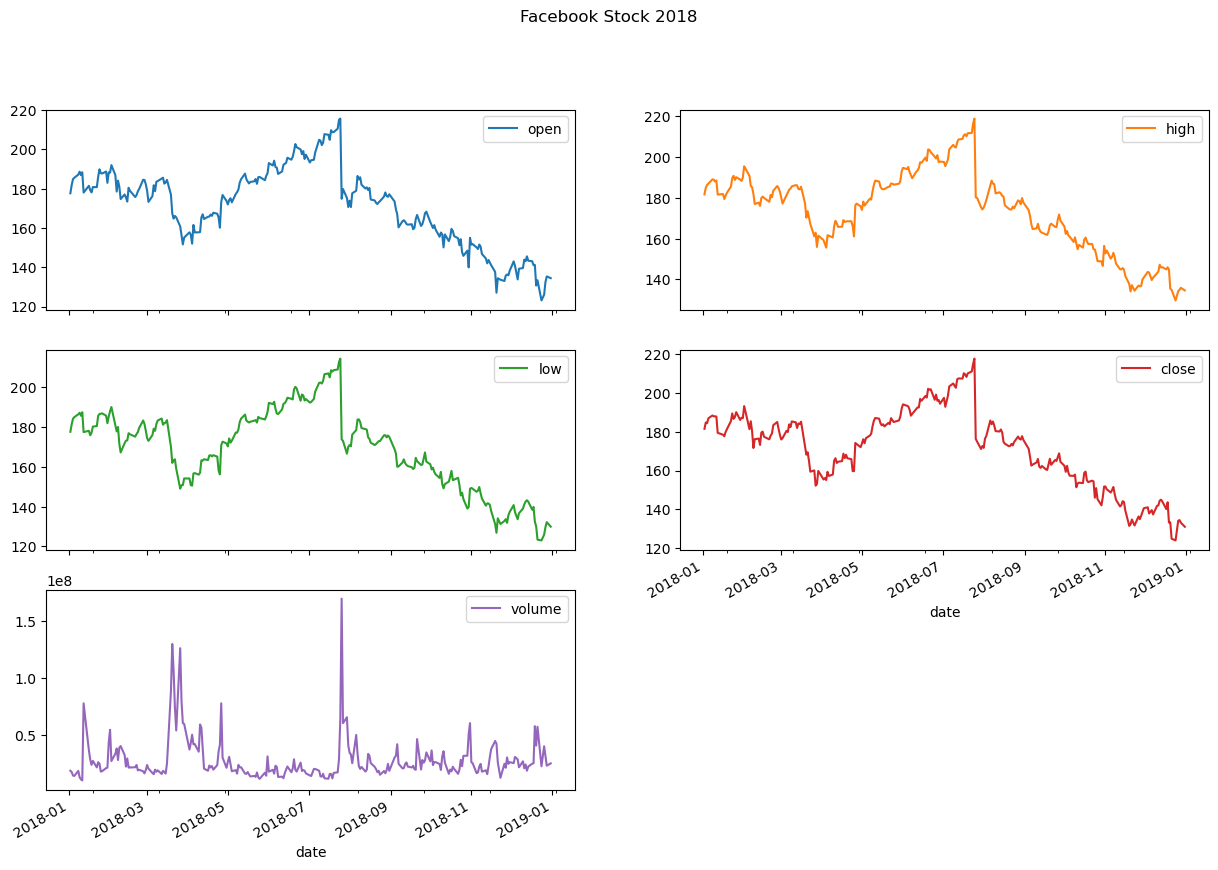

In [10]:
df_fb.plot(
    kind='line',
    subplots=True,
    layout=(3, 2),
    figsize=(15, 10),
    title='Facebook Stock 2018'
)

Note that we didn't provide a specific column to plot and pandas plotted all of them for us.

## Visualizing relationships between variables

### Scatter plots
We make scatter plots to help visualize the relationship between two variables. This makes it possible to spot correlations and possible non-linear relationships. 

Creating scatter plots requires we pass in `kind='scatter'` along with a column for the x-axis and a column for the y-axis:

<Axes: title={'center': 'Facebook Daily High - Low vs. Volume Traded'}, xlabel='volume', ylabel='max_abs_change'>

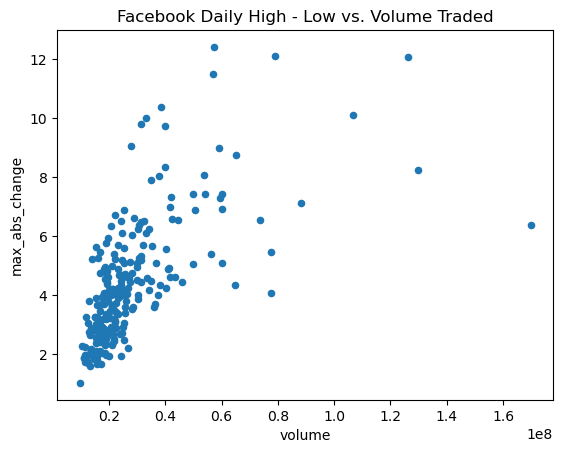

In [12]:
# Let's assume the days of high volume traded is correlated with large drops in stock price. We can use scatter plot
# to visualize this relationship

df_fb.assign(
    max_abs_change= df_fb.high - df_fb.low
).plot(
    kind='scatter', x='volume', y='max_abs_change',
    title='Facebook Daily High - Low vs. Volume Traded'
)

The relationship doesn't seem to be linear, but we can try a log transform on the x-axis since the scales of the axes are very different. With pandas, we simply pass in `logx=True`:

<Axes: title={'center': 'Facebook Daily High - Low vs. log(Volume Traded)'}, xlabel='volume', ylabel='max_abs_change'>

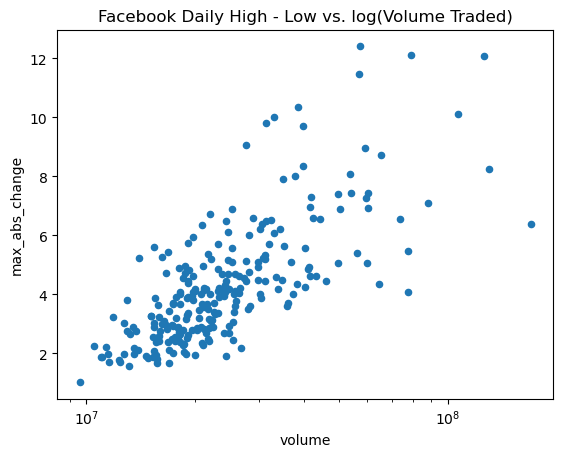

In [13]:
df_fb.assign(
    max_abs_change=df_fb.high - df_fb.low
).plot(
    kind='scatter', x='volume', y='max_abs_change',
    title='Facebook Daily High - Low vs. log(Volume Traded)', 
    logx=True
)

### Adding Transparency to Plots with alpha

Sometimes our plots have many overlapping values, but this can be impossible to see. This can be addressed by increasing the transparency of what we are plotting using the `alpha` parameter. It is a float in the range `[0, 1]` where 0 is completely transparent and 1 is completely opaque. By default this is 1, so let's put in a lower value and re-plot the scatter plot:

<Axes: title={'center': 'Facebook Daily High - Low vs. log(Volume Traded)'}, xlabel='volume', ylabel='max_abs_change'>

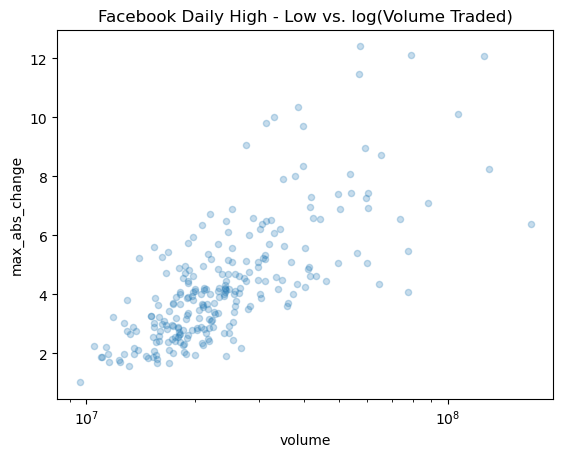

In [14]:
df_fb.assign(
    max_abs_change=df_fb.high - df_fb.low
).plot(
    kind='scatter', x='volume', y='max_abs_change',
    title='Facebook Daily High - Low vs. log(Volume Traded)',
    logx=True, alpha=0.25
)

### Hexbins

In the previous example, we can start to see the overlaps, but it is still difficult. Hexbins are another plot type that divide up the plot into hexagons, which are shaded according to the density of points there. With `pandas`, this is the `hexbin` value for the kind argument. It may also be necessary to tweak the `gridsize`, which determines the number of hexagons along the y-axis:

<Axes: title={'center': 'Facebook Daily High - Low vs. log(Volume Traded)'}, xlabel='log_volume', ylabel='max_abs_change'>

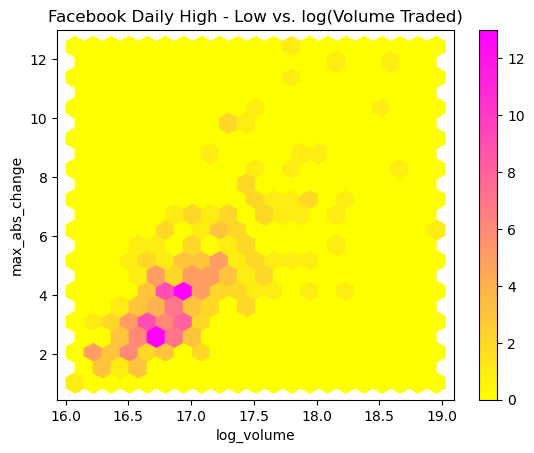

In [16]:
df_fb.assign(
    log_volume=np.log(df_fb.volume),
    max_abs_change=df_fb.high - df_fb.low
).plot(
    kind='hexbin',
    x='log_volume',
    y='max_abs_change',
    title='Facebook Daily High - Low vs. log(Volume Traded)',
    colormap='spring_r', #see for colormap https://matplotlib.org/stable/gallery/color/colormap_reference.html
    gridsize=20, 
    sharex=False # we have to pass this to see the x-axis
)

### Visualizing Correlations with Heatmaps

Pandas doesn't offer heatmaps; however, if we are able to get our data into a matrix, we can use `matshow()` from matplotlib:

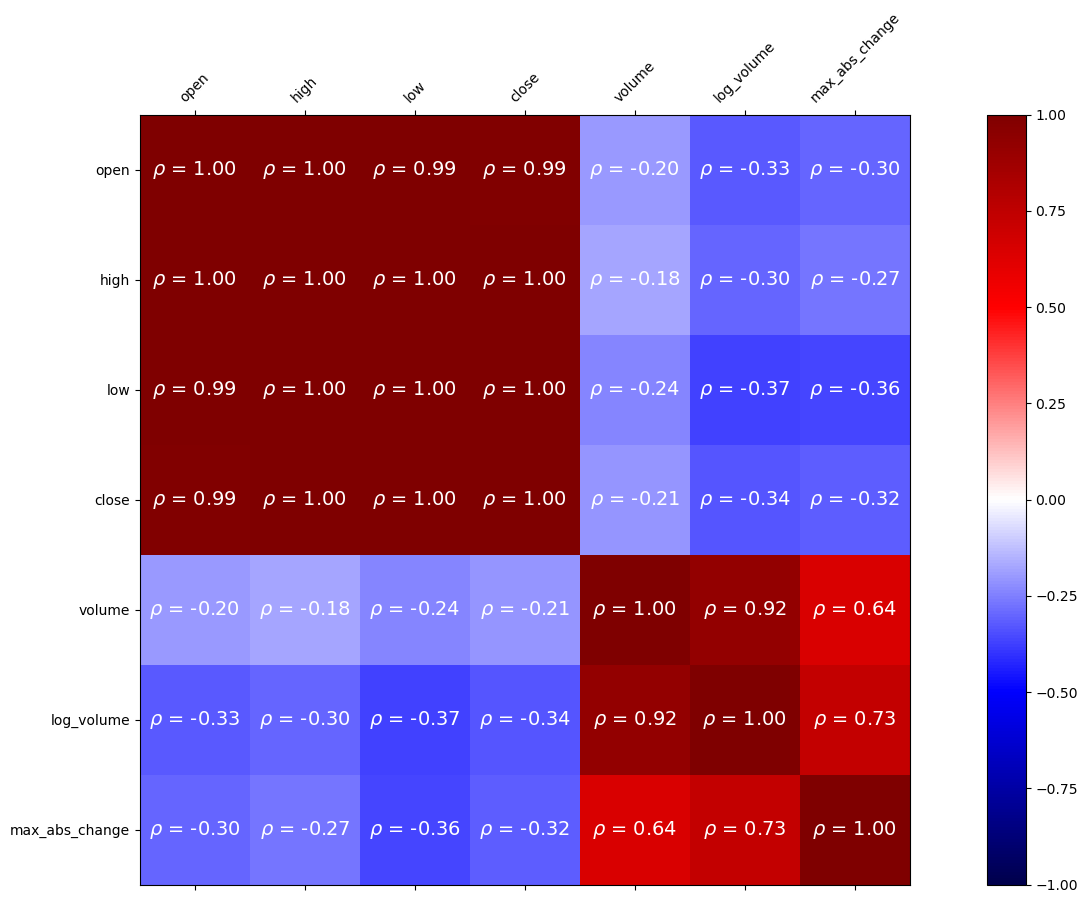

In [17]:
fig, ax = plt.subplots(figsize=(20, 10))

# calculate the correlation matrix
df_fb_corr = df_fb.assign(
    log_volume=np.log(df_fb.volume),
    max_abs_change=df_fb.high - df_fb.low
).corr()

# create the heatmap and colorbar
im = ax.matshow(df_fb_corr, cmap='seismic')
im.set_clim(-1, 1)
fig.colorbar(im)

# label the ticks with the column names
labels = [col.lower() for col in df_fb_corr.columns]
ax.set_xticks(ax.get_xticks()[1:-1]) # to handle bug in matplotlib
ax.set_xticklabels(labels, rotation=45)
ax.set_yticks(ax.get_yticks()[1:-1]) # to handle bug in matplotlib
ax.set_yticklabels(labels)

# include the value of the correlation coefficient in the boxes
for (i, j), coef in np.ndenumerate(df_fb_corr):
    ax.text(
        i, j, fr'$\rho$ = {coef:.2f}', # raw (r), format (f) string
        ha='center', va='center', 
        color='white', fontsize=14
    )

Accessing the values in the correlation matrix can be done with `loc[]`:

In [18]:
df_fb_corr.loc['max_abs_change', ['volume', 'log_volume']]

volume        0.642027
log_volume    0.731542
Name: max_abs_change, dtype: float64

## Visualizing distributions

### Histograms

With the pandas, making histograms is as easy as passing `kind='hist'` to the `plot()` method:

Text(0.5, 0, 'Volume traded')

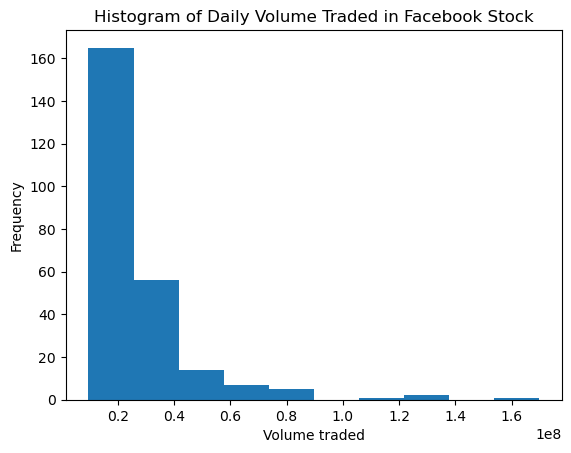

In [19]:
df_fb.volume.plot(
    kind='hist', 
    title='Histogram of Daily Volume Traded in Facebook Stock'
)
plt.xlabel('Volume traded') # labels the x-axis

We can overlap histograms to compare distributions provided we use the `alpha` parameter. For example, let's compare the usage and magnitude of the various measurement techniques (the magType column) in the earthquake data:

Text(0.5, 0, 'magnitude')

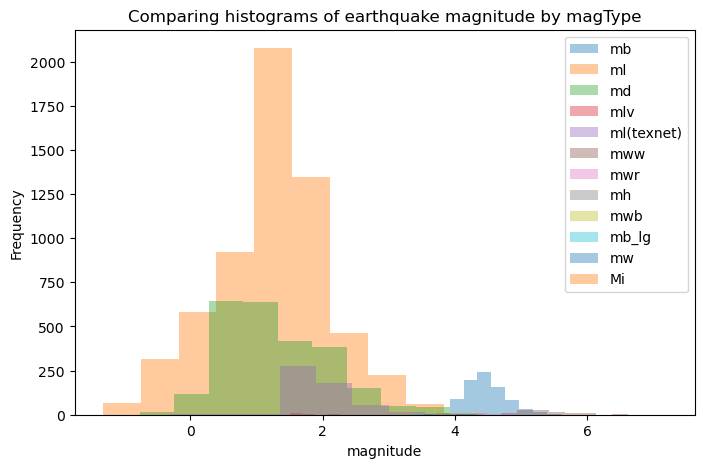

In [20]:
fig, axes = plt.subplots(figsize=(8, 5))

for magtype in df_quakes.magType.unique():
    data = df_quakes.query(f'magType == "{magtype}"').mag
    if not data.empty:
        data.plot(
            kind='hist', ax=axes, alpha=0.4, 
            label=magtype, legend=True,
            title='Comparing histograms of earthquake magnitude by magType'
        )

plt.xlabel('magnitude') # label the x-axis

### Kernel Density Estimation (KDE)

We can pass `kind='kde'` for an estimate of the probability density function (PDF), which tells us the probability of getting a particular value:

Text(0.5, 0, 'Price ($)')

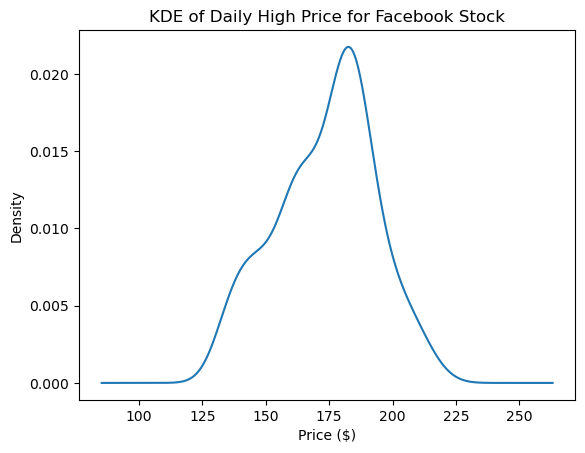

In [21]:
df_fb.high.plot(
    kind='kde', 
    title='KDE of Daily High Price for Facebook Stock'
)
plt.xlabel('Price ($)') # label the x-axis

### Adding to the result of plot()

The `plot()` method returns an `Axes` object. We can store this for additional customization of the plot, or we can pass this into another call to plot() as the ax argument to add to the original plot.

It can often be helpful to view the `KDE` superimposed on top of the `histogram`, which can be achieved with this strategy:

Text(0.5, 0, 'Price ($)')

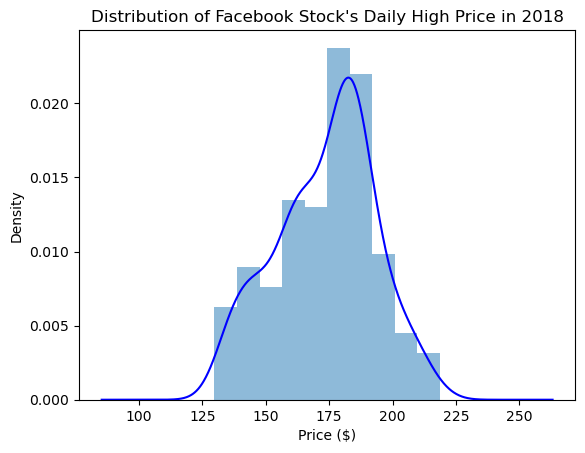

In [22]:
ax = df_fb.high.plot(kind='hist', density=True, alpha=0.5)
df_fb.high.plot(
    ax=ax, kind='kde', color='blue', 
    title='Distribution of Facebook Stock\'s Daily High Price in 2018'
)
plt.xlabel('Price ($)') 

## Box plots

To make box plots with pandas, we pass `kind='box`' to the `plot()` method:

Text(0, 0.5, 'price ($)')

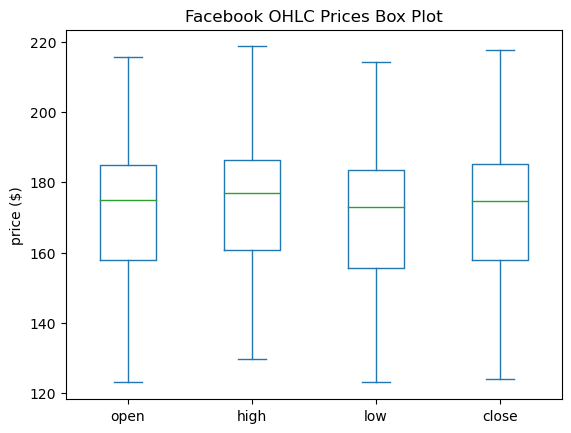

In [23]:
# Let's visualize the OHLC prices for Facebook stock across the whole dataset

df_fb.iloc[:,:4].plot(kind='box', title='Facebook OHLC Prices Box Plot')
plt.ylabel('price ($)') # label the y-axis 

If we pass in `notch=True`, we get a notched box plot. The notch represents a 95% confidence interval around the median, which can be helpful when comparing differences.

Text(0, 0.5, 'price ($)')

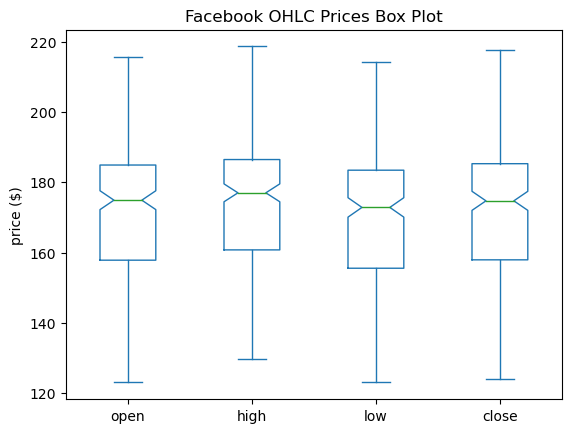

In [26]:
df_fb.iloc[:,:4].plot(kind='box', title='Facebook OHLC Prices Box Plot', notch=True)
plt.ylabel('price ($)') # label the y-axis

This can also be combined with a call to `groupby()`:

/var/folders/8b/sx311hbd0q3416wd84_c9kwc0000gn/T/ipykernel_15480/2286443035.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ).groupby('volume_bin').boxplot(


Text(0.5, 1.1, 'Facebook OHLC Box Plots by Volume Traded')

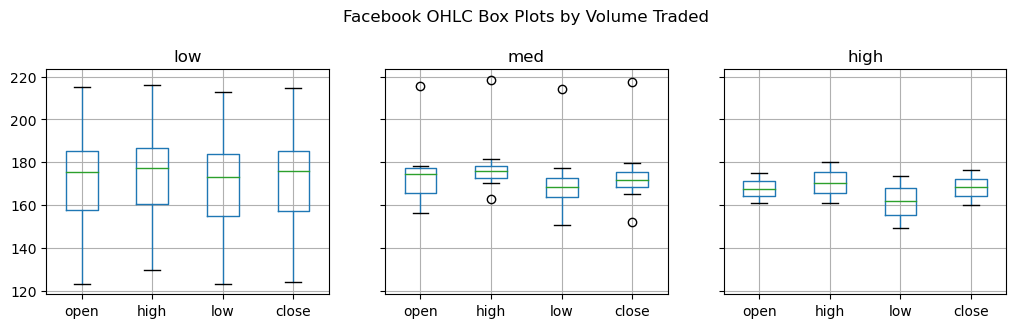

In [29]:
df_fb.assign(
    volume_bin=pd.cut(df_fb.volume, 3, labels=['low', 'med', 'high'])
).groupby('volume_bin').boxplot(
    column=['open', 'high', 'low', 'close'],
    layout=(1, 3), figsize=(12, 3)
)
plt.suptitle('Facebook OHLC Box Plots by Volume Traded', y=1.1)

We can use this to see the distribution of magnitudes across the different measurement methods for earthquakes:

Text(0, 0.5, 'magnitude')

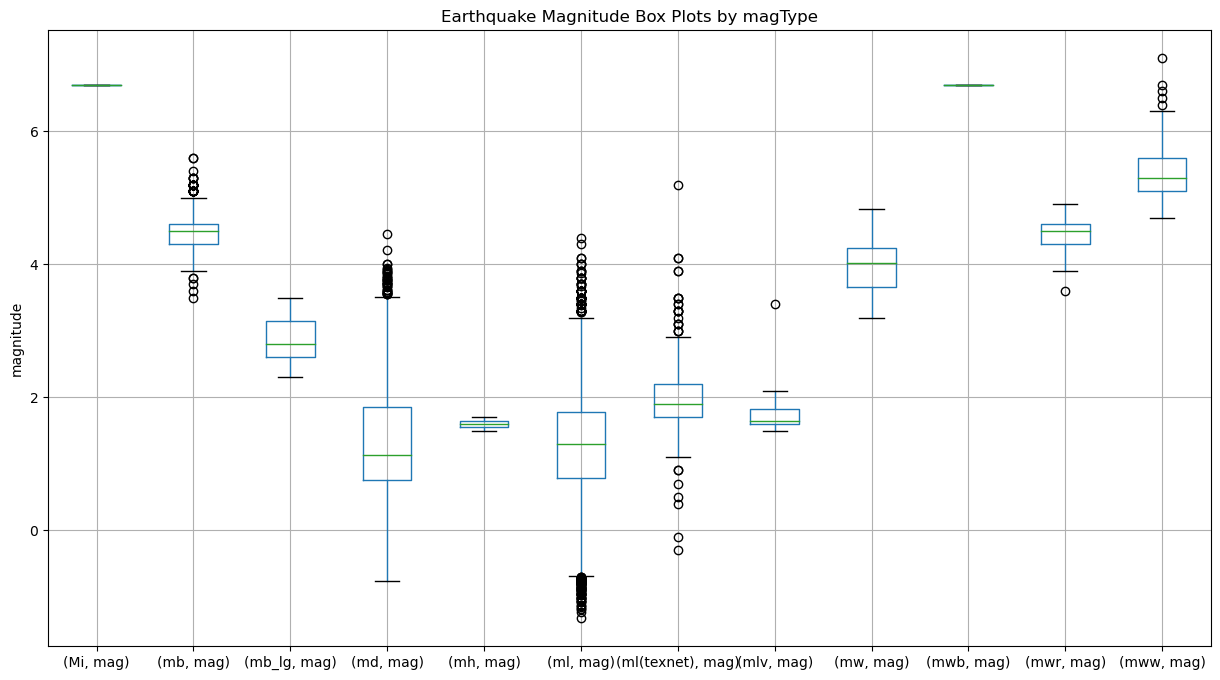

In [30]:
df_quakes[['mag', 'magType']].groupby('magType').boxplot(
    figsize=(15, 8), subplots=False
)
plt.title('Earthquake Magnitude Box Plots by magType')
plt.ylabel('magnitude') # label the y-axis 

## Counts and frequencies

### Bar charts

Passing `kind='barh'` gives us horizontal bars while `kind='bar'` gives us vertical ones. Let's use horizontal bars to look at the top 15 places for earthquakes in our data:

Text(0.5, 0, 'earthquakes')

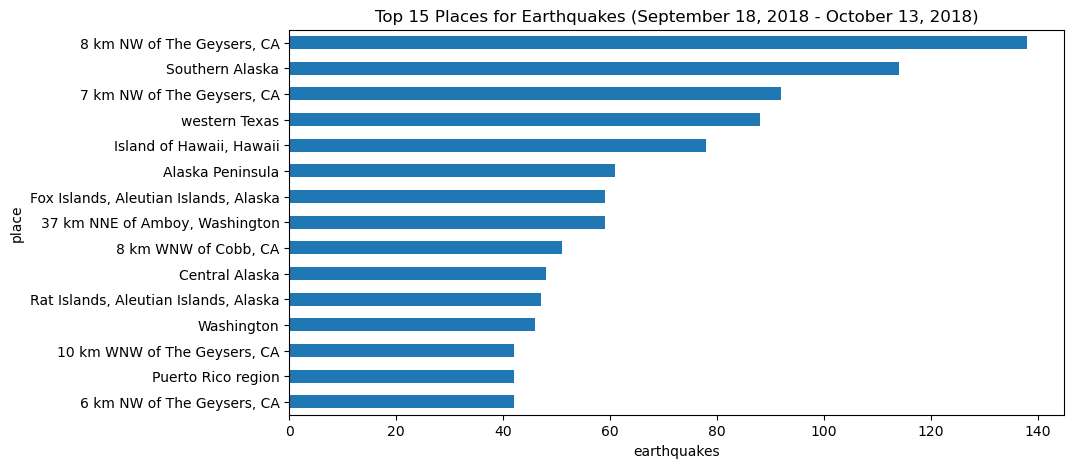

In [33]:
df_quakes.place.value_counts().iloc[14::-1,].plot(
    kind='barh', figsize=(10, 5),
    title='Top 15 Places for Earthquakes '
          '(September 18, 2018 - October 13, 2018)'
)
plt.xlabel('earthquakes') # label the x-axis 

In [32]:
df_quakes.columns

Index(['mag', 'place', 'time', 'updated', 'tz', 'url', 'detail', 'felt', 'cdi',
       'mmi', 'alert', 'status', 'tsunami', 'sig', 'net', 'code', 'ids',
       'sources', 'types', 'nst', 'dmin', 'rms', 'gap', 'magType', 'type',
       'title'],
      dtype='object')

### Stacked bars

<Axes: title={'center': 'Earthquakes by integer magnitude and magType'}, xlabel='mag_bin', ylabel='earthquakes'>

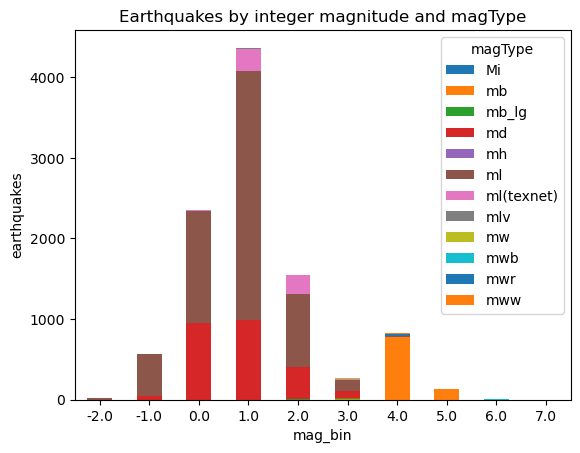

In [36]:
pivot = df_quakes.assign(
    mag_bin=lambda x: np.floor(x.mag)
).pivot_table(
    index='mag_bin', columns='magType', values='mag', aggfunc='count'
)
pivot.plot.bar(
    stacked=True, rot=0, ylabel='earthquakes', 
    title='Earthquakes by integer magnitude and magType'
)

# Resources:

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#basic-plotting-plot
https://matplotlib.org/stable/gallery/color/colormap_reference.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
https://pandas.pydata.org/docs/user_guide/visualization.html
https://matplotlib.org/stable/users/explain/quick_start.html
https://wesmckinney.com/book/plotting-and-visualization#mpl_subplots_two

Hands-on Data Analysis with Pandas by Stefanie Molin

